In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

import src.io as sio
import src.preprocessing as spp
import src.fitting as sft
import seaborn as sns


plt.style.use('seaborn')

In [2]:
DATA_FOLDER = "20211116_FR0612-3G18_RT"
DATA_FOLDERPATH = sio.get_qudiamond_folderpath(DATA_FOLDER)
FIGURE_FOLDERPATH = sio.get_figure_folderpath(DATA_FOLDER)

src.io :: INFO :: qudiamond folderpath is \\kernix\qudiamond\Data\20211116_FR0612-3G18_RT\


In [13]:
CONFOCAL_SUBFOLDER = r"2021\11\20211126\Confocal"
CONFOCAL_SUBFOLDERPATH = sio.get_qudi_data_path(os.path.join(DATA_FOLDER, CONFOCAL_SUBFOLDER))

In [23]:
filepath = os.path.join(CONFOCAL_SUBFOLDERPATH, "20211126-1239-13__confocal_xy_image_1.dat")

C:\Users\pinto\AppData\Local\Temp\ipykernel_14920\2484934477.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(img, ax=ax)
src.io :: INFO :: Saving '20211126-1239-13__confocal_xy_image_1' to 'C:/Nextcloud\Data_Analysis\20211116_FR0612-3G18_RT'


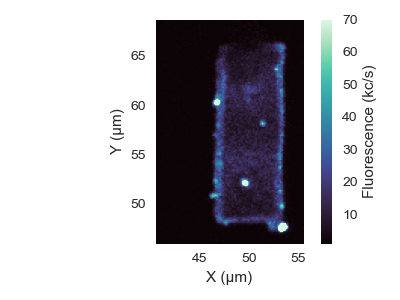

In [29]:
params = sio.read_qudi_parameters(filepath)
data = np.genfromtxt(filepath, dtype=None, delimiter='\t')

extent = np.array([params['X image min (m)'], params['X image max (m)'], params['Y image min'], params['Y image max']]) * 1e6
fig, ax = plt.subplots(figsize=(4, 3))
img = ax.imshow(data/1e3, cmap=sns.color_palette("mako", as_cmap=True), vmin=1, vmax=70, origin="lower", extent=extent)
ax.grid(False)
cbar = fig.colorbar(img, ax=ax)
cbar.set_label("Fluorescence (kc/s)")
ax.set_xlabel("X (μm)")
ax.set_ylabel("Y (μm)")
fig.tight_layout()
sio.save_figures(folder=FIGURE_FOLDERPATH, filename="20211126-1239-13__confocal_xy_image_1.dat")

In [3]:
AUTOCORR_SUBFOLDER = r"2021\11\20211126\Autocorrelation"
AUTOCORR_SUBFOLDERPATH = sio.get_qudi_data_path(os.path.join(DATA_FOLDER, AUTOCORR_SUBFOLDER))

In [ ]:
df

src.io :: INFO :: Saving '20211126-1305-05_35mW_autocorrelation' to 'C:/Nextcloud\Data_Analysis\20211116_FR0612-3G18_RT'


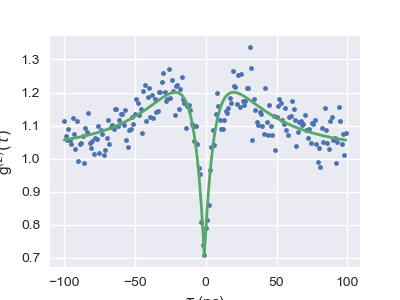

In [12]:
fig, ax = plt.subplots(figsize=(4, 3))

df = sio.read_into_df(os.path.join(AUTOCORR_SUBFOLDERPATH, "20211126-1305-05_35mW_autocorrelation.dat"))
x = df["Time (ps)"] / 1e3
y = df["g2(t) norm"]

fit = sft.autocorrelation_fit(x, y)

ax.plot(x, y, ".")
ax.plot(x, fit["fit"], linewidth=2)

ax.set_xlabel(r"$\tau$ (ns)")
ax.set_ylabel(r"g$^{(2)} (\tau)$")

sio.save_figures(folder=FIGURE_FOLDERPATH, filename="20211126-1305-05_35mW_autocorrelation")

20211126-1300-45_100mW_autocorrelation.dat
20211126-1302-47_50mW_autocorrelation.dat
20211126-1304-05_25mW_autocorrelation.dat
20211126-1305-05_35mW_autocorrelation.dat
20211126-1307-38_40mW_autocorrelation.dat


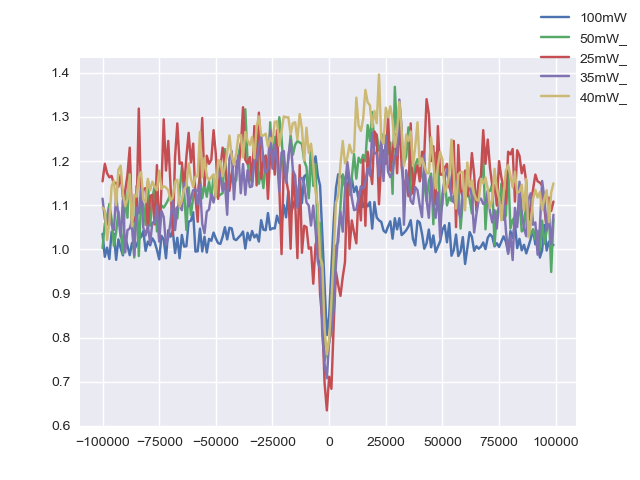

In [10]:
%matplotlib widget
fig, ax = plt.subplots()

for file in os.listdir(AUTOCORR_SUBFOLDERPATH):
    if file.endswith("mW_autocorrelation.dat"):
        print(file)
        df = sio.read_into_df(os.path.join(AUTOCORR_SUBFOLDERPATH, file))
        ax.plot(df["Time (ps)"], df["g2(t) norm"], label=f"{file[17:22]}")
fig.legend()

In [ ]:
optimized_positions = np.array(
    [
       [3.43827438e-05, 9.13976768e-06, 4.71517473e-06],
       [3.49163374e-05, 9.00172571e-06, 4.71517473e-06],
       [3.53106037e-05, 9.13064807e-06, 4.71517473e-06],
       [3.46186516e-05, 9.17515368e-06, 4.71517473e-06]
    ]
)

In [ ]:
for pos in optimized_positions:
    print(pos)

In [ ]:
%matplotlib widget
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)
ax1.plot(optimized_positions[:, 0] * 1e6, ".-", label=f"stddev = {np.std(optimized_positions[:, 0]) * 1e6:.2f} um")
ax1.legend()

ax2.plot(optimized_positions[:, 1] * 1e6, ".-", label=f"stddev = {np.std(optimized_positions[:, 1]) * 1e6:.2f} um")
ax2.legend()


ax3.plot(optimized_positions[:, 2], ".-", label=f"stddev = {np.std(optimized_positions[:, 2]) * 1e6:.2f} um")
ax3.legend()

In [ ]:
N = 16

success_rate = 0.75
profit = 1000
loss = 2000 / 4

((N * success_rate) * profit) - (N * (1 - success_rate) * loss)